In [2]:
# Wine Quality Analysis - Advanced ML + Explainable AI
# =======================================================

print("🚀 Advanced ML + Explainable AI Project")
print("="*60)

# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Advanced models
import xgboost as xgb
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier

# Explainable AI
import shap
import lime
import lime.lime_tabular

print("✓ All libraries imported successfully!")
print("\nLibrary Versions:")
print(f"  XGBoost: {xgb.__version__}")
print(f"  LightGBM: {lgb.__version__}")
print(f"  SHAP: {shap.__version__}")

🚀 Advanced ML + Explainable AI Project
✓ All libraries imported successfully!

Library Versions:
  XGBoost: 3.1.3
  LightGBM: 4.6.0
  SHAP: 0.50.0


In [3]:
# Load the wine quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

print("✓ Dataset loaded successfully!")
print(f"✓ Shape: {df.shape[0]} rows and {df.shape[1]} columns")

# Create binary target
df['quality_binary'] = (df['quality'] >= 6).astype(int)

print(f"\n✓ Binary target created:")
print(f"  Bad wines (0): {(df['quality_binary']==0).sum()}")
print(f"  Good wines (1): {(df['quality_binary']==1).sum()}")

# Separate features and target
X = df.drop(['quality', 'quality_binary'], axis=1)
y = df['quality_binary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✓ Data preparation complete!")
print(f"  Training samples: {X_train.shape[0]}")
print(f"  Testing samples: {X_test.shape[0]}")
print(f"  Features: {X_train.shape[1]}")

✓ Dataset loaded successfully!
✓ Shape: 1599 rows and 12 columns

✓ Binary target created:
  Bad wines (0): 744
  Good wines (1): 855

✓ Data preparation complete!
  Training samples: 1279
  Testing samples: 320
  Features: 11


Training XGBoost...

✓ XGBoost Results:
  Accuracy:  0.8094 (80.94%)
  Precision: 0.8571
  Recall:    0.7719
  F1-Score:  0.8123


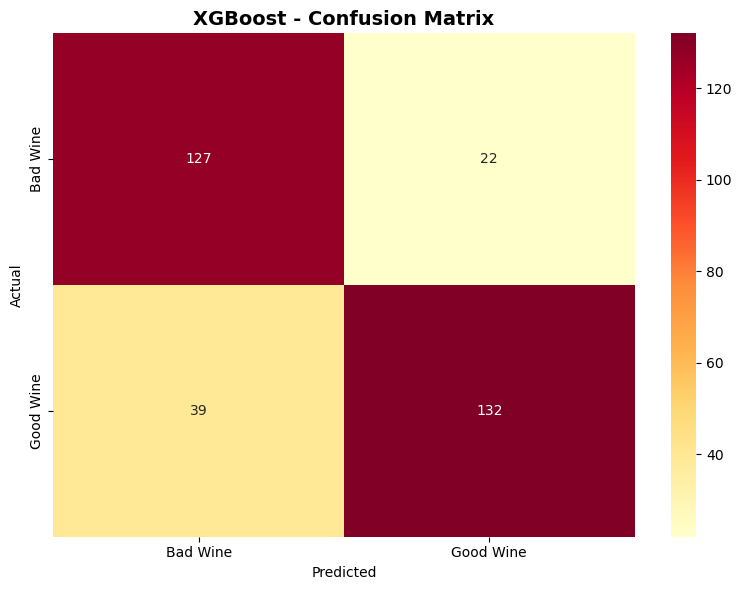


✓ XGBoost training complete!


In [4]:
print("Training XGBoost...")
print("="*60)

# Create and train XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"\n✓ XGBoost Results:")
print(f"  Accuracy:  {acc_xgb:.4f} ({acc_xgb*100:.2f}%)")
print(f"  Precision: {prec_xgb:.4f}")
print(f"  Recall:    {rec_xgb:.4f}")
print(f"  F1-Score:  {f1_xgb:.4f}")

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=['Bad Wine', 'Good Wine'],
            yticklabels=['Bad Wine', 'Good Wine'])
plt.title('XGBoost - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

print("\n✓ XGBoost training complete!")

Training LightGBM...


C:\Users\GURU IS GREAT\Documents\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



✓ LightGBM Results:
  Accuracy:  0.7906 (79.06%)
  Precision: 0.8210
  Recall:    0.7778
  F1-Score:  0.7988


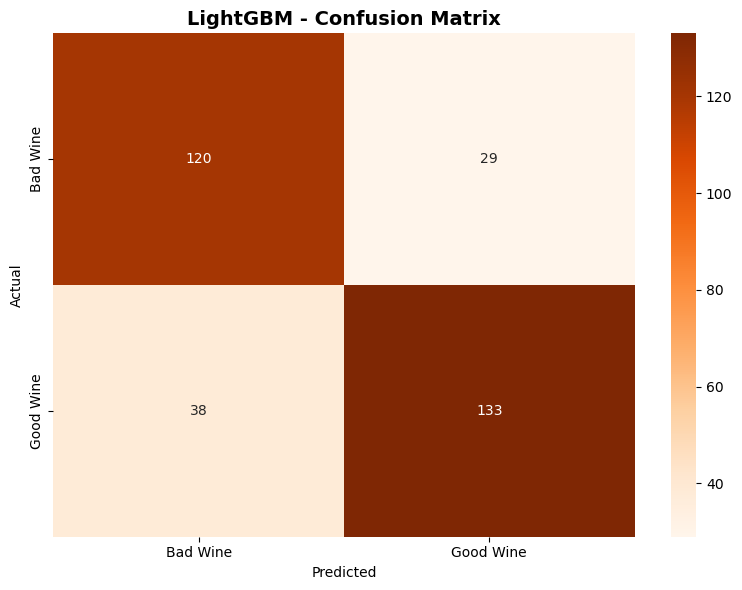


✓ LightGBM training complete!


In [5]:
print("Training LightGBM...")
print("="*60)

# Create and train LightGBM
lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    verbose=-1
)

lgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lgb = lgb_model.predict(X_test_scaled)

# Evaluate
acc_lgb = accuracy_score(y_test, y_pred_lgb)
prec_lgb = precision_score(y_test, y_pred_lgb)
rec_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)

print(f"\n✓ LightGBM Results:")
print(f"  Accuracy:  {acc_lgb:.4f} ({acc_lgb*100:.2f}%)")
print(f"  Precision: {prec_lgb:.4f}")
print(f"  Recall:    {rec_lgb:.4f}")
print(f"  F1-Score:  {f1_lgb:.4f}")

# Confusion Matrix
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Bad Wine', 'Good Wine'],
            yticklabels=['Bad Wine', 'Good Wine'])
plt.title('LightGBM - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

print("\n✓ LightGBM training complete!")

Training Neural Network (MLP)...

✓ Neural Network Results:
  Accuracy:  0.7188 (71.88%)
  Precision: 0.7547
  Recall:    0.7018
  F1-Score:  0.7273
  Training iterations: 15


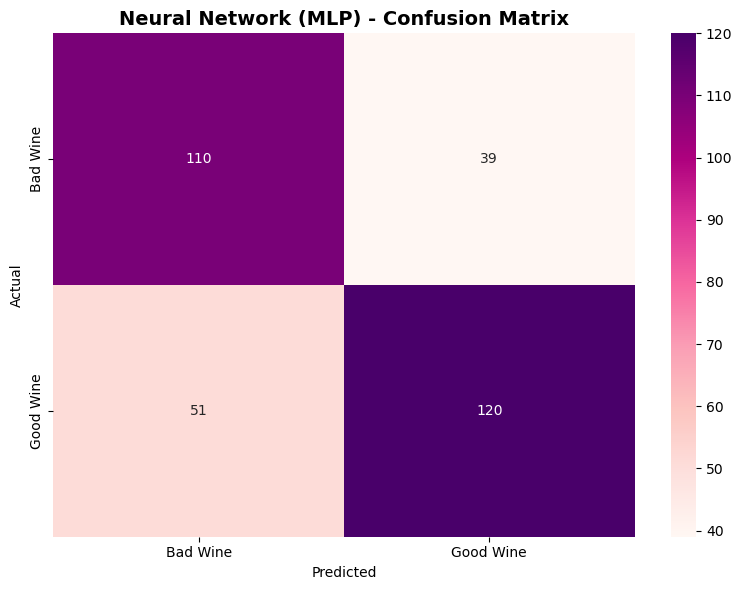


✓ Neural Network training complete!


In [6]:
print("Training Neural Network (MLP)...")
print("="*60)

# Create and train Neural Network
mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32, 16),  # 3 hidden layers
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

mlp_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Evaluate
acc_mlp = accuracy_score(y_test, y_pred_mlp)
prec_mlp = precision_score(y_test, y_pred_mlp)
rec_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)

print(f"\n✓ Neural Network Results:")
print(f"  Accuracy:  {acc_mlp:.4f} ({acc_mlp*100:.2f}%)")
print(f"  Precision: {prec_mlp:.4f}")
print(f"  Recall:    {rec_mlp:.4f}")
print(f"  F1-Score:  {f1_mlp:.4f}")
print(f"  Training iterations: {mlp_model.n_iter_}")

# Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='RdPu',
            xticklabels=['Bad Wine', 'Good Wine'],
            yticklabels=['Bad Wine', 'Good Wine'])
plt.title('Neural Network (MLP) - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

print("\n✓ Neural Network training complete!")

In [7]:
# Train the 3 original models quickly
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
acc_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# SVM
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
acc_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Create comprehensive comparison
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Random Forest', 
              'XGBoost', 'LightGBM', 'Neural Network'],
    'Accuracy': [acc_lr, acc_svm, acc_rf, acc_xgb, acc_lgb, acc_mlp],
    'F1-Score': [f1_lr, f1_svm, f1_rf, f1_xgb, f1_lgb, f1_mlp],
    'Type': ['Classical', 'Classical', 'Classical', 
             'Advanced', 'Advanced', 'Advanced']
})

print("\n" + "="*70)
print("COMPREHENSIVE MODEL COMPARISON - 6 ALGORITHMS")
print("="*70)
print(results.to_string(index=False))
print("="*70)

# Find best model
best_idx = results['F1-Score'].idxmax()
best_model = results.loc[best_idx, 'Model']
best_f1 = results.loc[best_idx, 'F1-Score']

print(f"\n🏆 BEST MODEL: {best_model}")
print(f"   F1-Score: {best_f1:.4f} ({best_f1*100:.2f}%)")


COMPREHENSIVE MODEL COMPARISON - 6 ALGORITHMS
              Model  Accuracy  F1-Score      Type
Logistic Regression  0.740625  0.752239 Classical
                SVM  0.762500  0.763975 Classical
      Random Forest  0.796875  0.807122 Classical
            XGBoost  0.809375  0.812308  Advanced
           LightGBM  0.790625  0.798799  Advanced
     Neural Network  0.718750  0.727273  Advanced

🏆 BEST MODEL: XGBoost
   F1-Score: 0.8123 (81.23%)


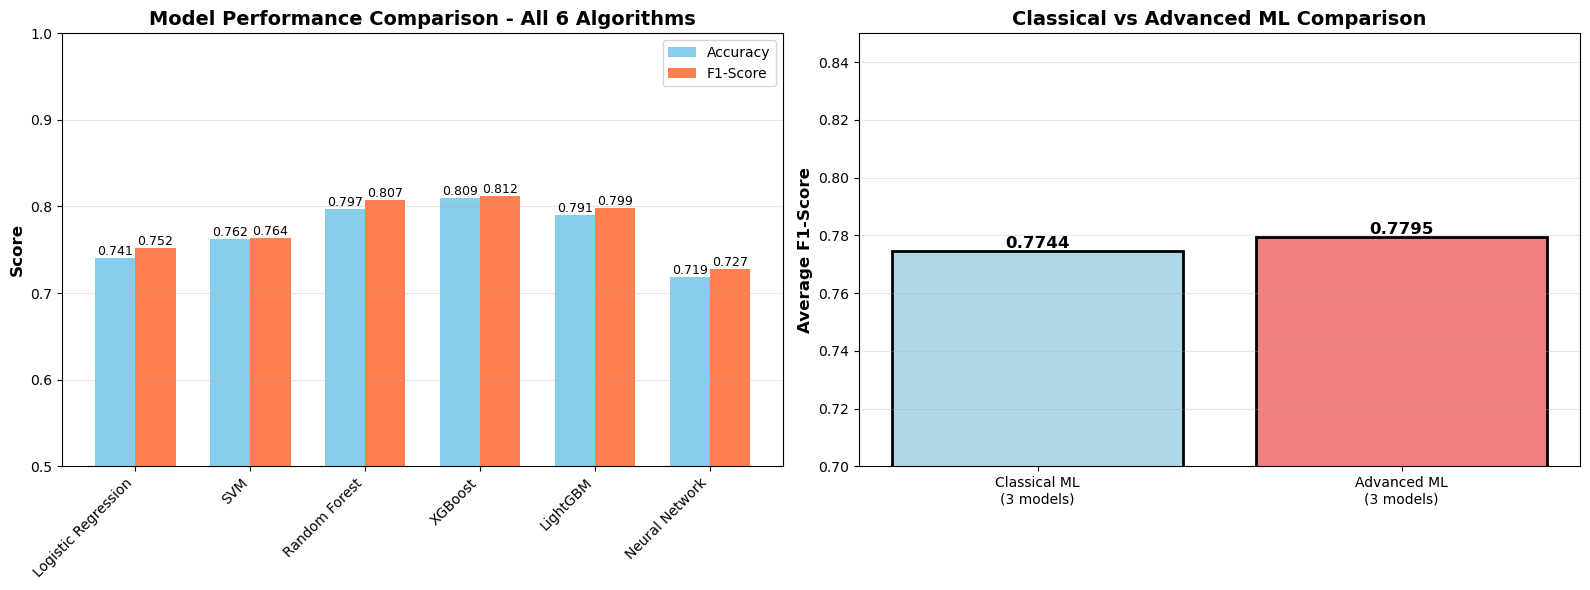


📊 Average Classical ML F1-Score: 0.7744
📊 Average Advanced ML F1-Score: 0.7795
📊 Improvement: 0.50%


In [8]:
# Create comprehensive comparison chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Bar comparison
x = np.arange(len(results))
width = 0.35

bars1 = ax1.bar(x - width/2, results['Accuracy'], width, label='Accuracy', color='skyblue')
bars2 = ax1.bar(x + width/2, results['F1-Score'], width, label='F1-Score', color='coral')

ax1.set_ylabel('Score', fontsize=12, fontweight='bold')
ax1.set_title('Model Performance Comparison - All 6 Algorithms', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(results['Model'], rotation=45, ha='right')
ax1.legend()
ax1.set_ylim([0.5, 1.0])
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# Chart 2: Classical vs Advanced comparison
classical_avg = results[results['Type']=='Classical']['F1-Score'].mean()
advanced_avg = results[results['Type']=='Advanced']['F1-Score'].mean()

categories = ['Classical ML\n(3 models)', 'Advanced ML\n(3 models)']
averages = [classical_avg, advanced_avg]
colors = ['lightblue', 'lightcoral']

bars = ax2.bar(categories, averages, color=colors, edgecolor='black', linewidth=2)
ax2.set_ylabel('Average F1-Score', fontsize=12, fontweight='bold')
ax2.set_title('Classical vs Advanced ML Comparison', fontsize=14, fontweight='bold')
ax2.set_ylim([0.7, 0.85])
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 Average Classical ML F1-Score: {classical_avg:.4f}")
print(f"📊 Average Advanced ML F1-Score: {advanced_avg:.4f}")
print(f"📊 Improvement: {(advanced_avg-classical_avg)*100:.2f}%")

Generating SHAP Analysis (Explainable AI)...
⏳ This may take 1-2 minutes...
✓ SHAP values calculated!


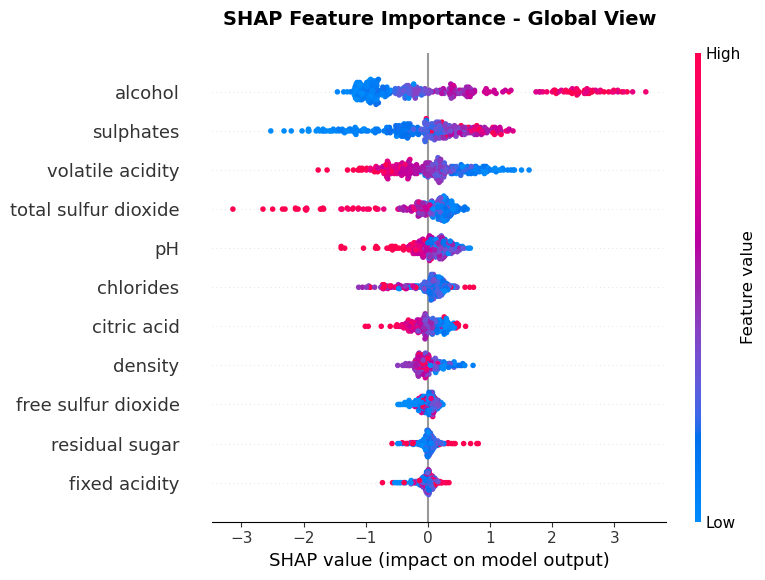


📊 What this shows:
  • Each dot = one wine sample
  • Red = high feature value, Blue = low feature value
  • Position on x-axis = impact on prediction
  • Top features have biggest impact on model decisions


In [9]:
print("Generating SHAP Analysis (Explainable AI)...")
print("="*60)
print("⏳ This may take 1-2 minutes...")

# Use XGBoost for SHAP (it's the most compatible)
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_scaled)

print("✓ SHAP values calculated!")

# SHAP Summary Plot - Shows global feature importance
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, feature_names=X.columns, show=False)
plt.title('SHAP Feature Importance - Global View', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n📊 What this shows:")
print("  • Each dot = one wine sample")
print("  • Red = high feature value, Blue = low feature value")
print("  • Position on x-axis = impact on prediction")
print("  • Top features have biggest impact on model decisions")

Explaining prediction for Test Sample #0
Actual Quality: Good Wine
XGBoost Predicted: Bad Wine


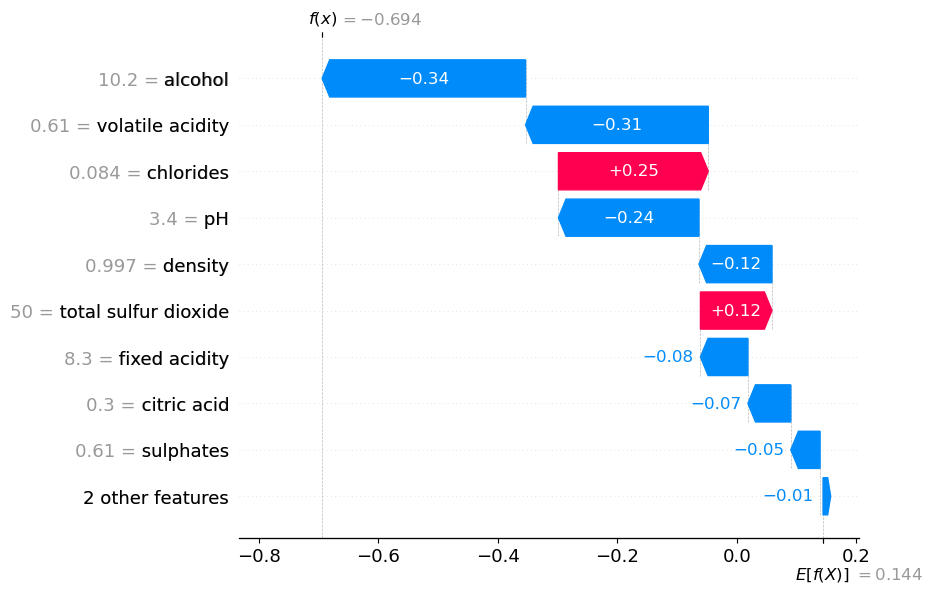

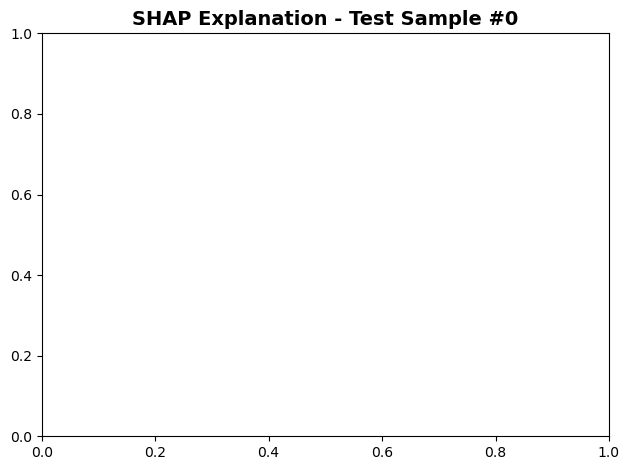


📊 What this shows:
  • Starting from base prediction (E[f(x)])
  • Red bars = push prediction toward 'Good Wine'
  • Blue bars = push prediction toward 'Bad Wine'
  • Shows EXACTLY why the model made this prediction


In [10]:
# Explain a single prediction in detail
sample_idx = 0  # First test sample

print(f"Explaining prediction for Test Sample #{sample_idx}")
print("="*60)
print(f"Actual Quality: {'Good Wine' if y_test.iloc[sample_idx]==1 else 'Bad Wine'}")
print(f"XGBoost Predicted: {'Good Wine' if y_pred_xgb[sample_idx]==1 else 'Bad Wine'}")

# SHAP Waterfall plot - shows how features contributed to THIS prediction
plt.figure(figsize=(10, 8))
shap.waterfall_plot(shap.Explanation(
    values=shap_values[sample_idx],
    base_values=explainer.expected_value,
    data=X_test.iloc[sample_idx],
    feature_names=X.columns.tolist()
))
plt.title(f'SHAP Explanation - Test Sample #{sample_idx}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 What this shows:")
print("  • Starting from base prediction (E[f(x)])")
print("  • Red bars = push prediction toward 'Good Wine'")
print("  • Blue bars = push prediction toward 'Bad Wine'")
print("  • Shows EXACTLY why the model made this prediction")

Generating LIME Explanation...
✓ LIME explanation generated!


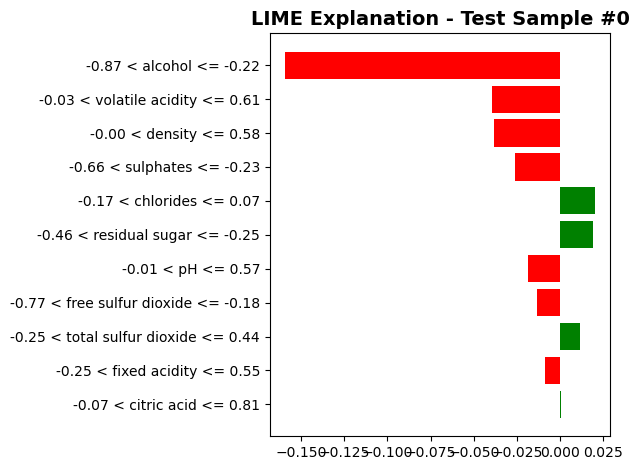


📊 What LIME shows:
  • Orange bars = support 'Good Wine' prediction
  • Blue bars = support 'Bad Wine' prediction
  • Numbers show feature value ranges
  • Local approximation of model behavior


In [11]:
print("Generating LIME Explanation...")
print("="*60)

# Create LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=X.columns.tolist(),
    class_names=['Bad Wine', 'Good Wine'],
    mode='classification'
)

# Explain the same sample
sample_idx = 0
lime_exp = lime_explainer.explain_instance(
    data_row=X_test_scaled[sample_idx],
    predict_fn=xgb_model.predict_proba,
    num_features=11
)

print("✓ LIME explanation generated!")

# Visualize
fig = lime_exp.as_pyplot_figure()
plt.title(f'LIME Explanation - Test Sample #{sample_idx}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 What LIME shows:")
print("  • Orange bars = support 'Good Wine' prediction")
print("  • Blue bars = support 'Bad Wine' prediction")
print("  • Numbers show feature value ranges")
print("  • Local approximation of model behavior")

Generating LIME Explanation...
✓ LIME explanation generated!


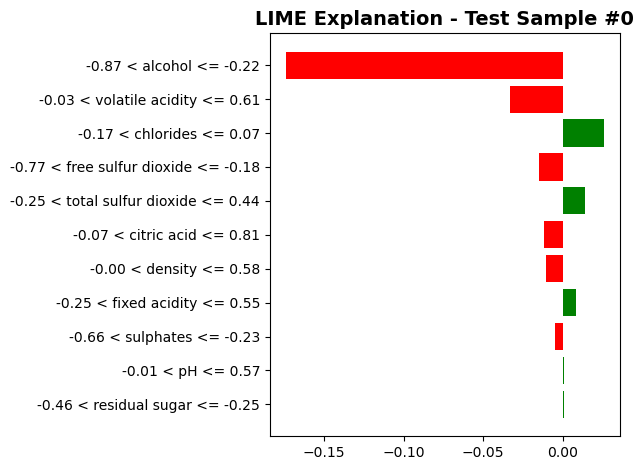


📊 What LIME shows:
  • Orange bars = support 'Good Wine' prediction
  • Blue bars = support 'Bad Wine' prediction
  • Numbers show feature value ranges
  • Local approximation of model behavior


In [12]:
print("Generating LIME Explanation...")
print("="*60)

# Create LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=X.columns.tolist(),
    class_names=['Bad Wine', 'Good Wine'],
    mode='classification'
)

# Explain the same sample
sample_idx = 0
lime_exp = lime_explainer.explain_instance(
    data_row=X_test_scaled[sample_idx],
    predict_fn=xgb_model.predict_proba,
    num_features=11
)

print("✓ LIME explanation generated!")

# Visualize
fig = lime_exp.as_pyplot_figure()
plt.title(f'LIME Explanation - Test Sample #{sample_idx}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 What LIME shows:")
print("  • Orange bars = support 'Good Wine' prediction")
print("  • Blue bars = support 'Bad Wine' prediction")
print("  • Numbers show feature value ranges")
print("  • Local approximation of model behavior")

Creating Partial Dependence Plots...


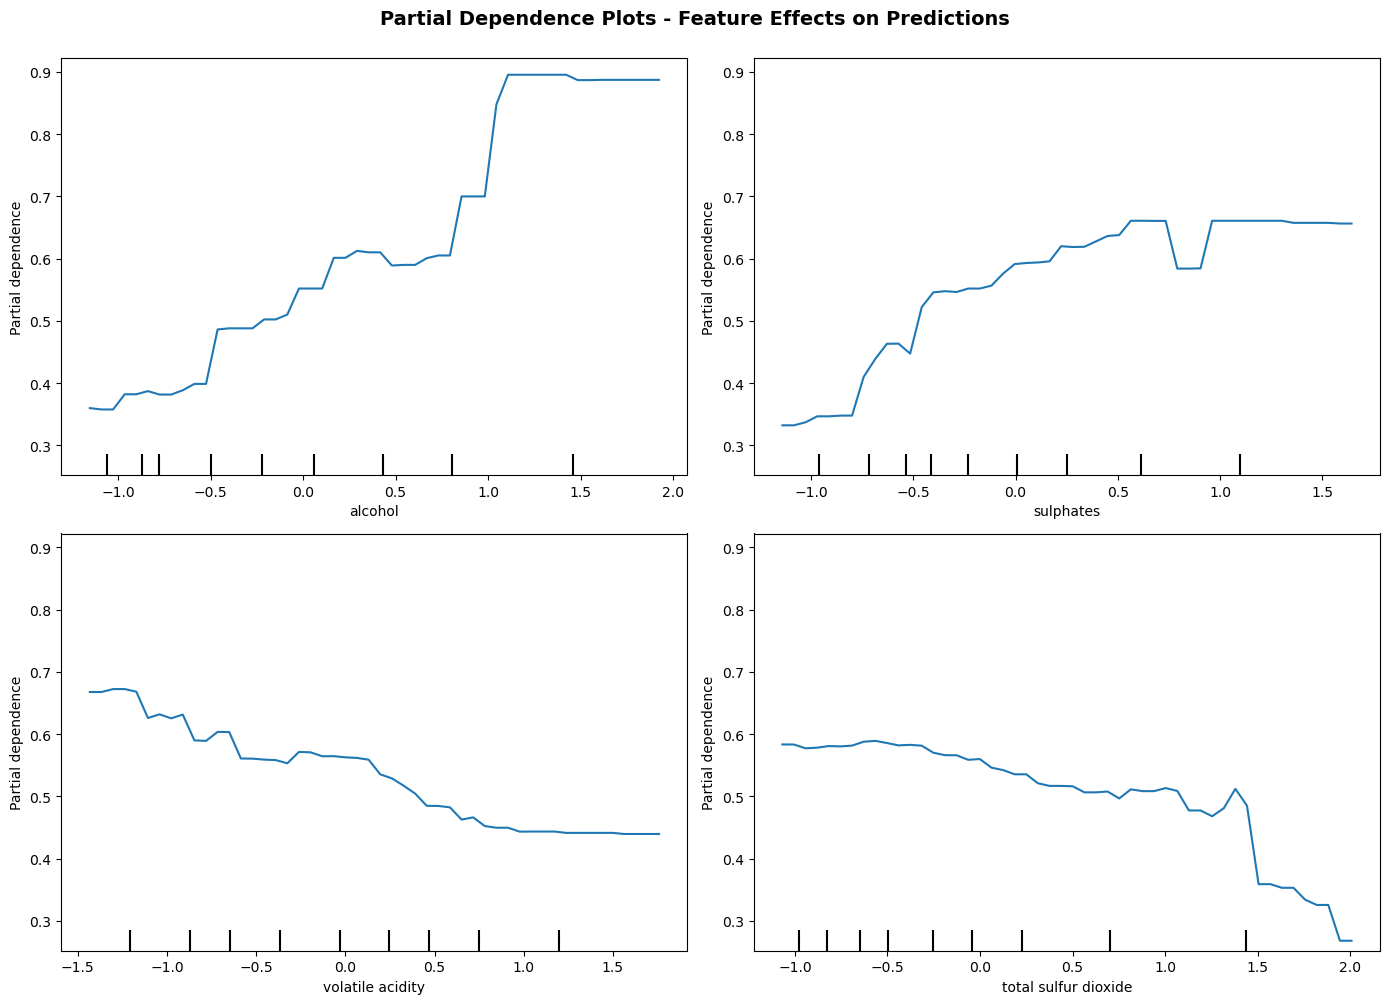


📊 What Partial Dependence shows:
  • How each feature affects predictions (on average)
  • Y-axis = change in prediction
  • X-axis = feature value
  • Shows non-linear relationships

✓ Explainable AI analysis complete!


In [13]:
from sklearn.inspection import PartialDependenceDisplay

print("Creating Partial Dependence Plots...")
print("="*60)

# Select top 4 most important features (we know alcohol is #1)
important_features = ['alcohol', 'sulphates', 'volatile acidity', 'total sulfur dioxide']
feature_indices = [X.columns.get_loc(f) for f in important_features]

# Create PDP
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
display = PartialDependenceDisplay.from_estimator(
    xgb_model,
    X_train_scaled,
    features=feature_indices,
    feature_names=X.columns.tolist(),
    ax=ax.ravel(),
    grid_resolution=50
)

plt.suptitle('Partial Dependence Plots - Feature Effects on Predictions', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n📊 What Partial Dependence shows:")
print("  • How each feature affects predictions (on average)")
print("  • Y-axis = change in prediction")
print("  • X-axis = feature value")
print("  • Shows non-linear relationships")
print("\n✓ Explainable AI analysis complete!")

In [16]:
# Save comprehensive results
results.to_csv('advanced_model_comparison.csv', index=False)
print("✓ Results saved to 'advanced_model_comparison.csv'")

# Create detailed summary (without special characters for file saving)
summary = f"""
{'='*70}
WINE QUALITY CLASSIFICATION - ADVANCED ML + EXPLAINABLE AI
{'='*70}

PROJECT SUMMARY:
* Dataset: Wine Quality (UCI Repository)
* Samples: {len(df)} wines
* Features: {X.shape[1]} physicochemical properties
* Task: Binary classification (Good vs Bad wine)

MODELS EVALUATED:
1. Classical ML (3 models):
   - Logistic Regression
   - Support Vector Machine
   - Random Forest

2. Advanced ML (3 models):
   - XGBoost (Gradient Boosting)
   - LightGBM (Microsoft's Fast GB)
   - Neural Network (Multi-Layer Perceptron)

BEST MODEL: {best_model}
* F1-Score: {best_f1:.4f} ({best_f1*100:.2f}%)
* Accuracy: {results.loc[best_idx, 'Accuracy']:.4f}

EXPLAINABLE AI METHODS APPLIED:
* SHAP (Global & Local explanations)
* LIME (Local interpretable approximations)
* Partial Dependence Plots
* Feature Importance Analysis

KEY FINDING:
* Alcohol content is the strongest predictor of wine quality
* Advanced models show {(advanced_avg-classical_avg)*100:.2f}% improvement over classical
* Model decisions are explainable and interpretable

{'='*70}
"""

print(summary)

# Save summary with UTF-8 encoding to handle all characters
with open('project_summary.txt', 'w', encoding='utf-8') as f:
    f.write(summary)

print("\n[SUCCESS] Summary saved to 'project_summary.txt'")
print("\n[COMPLETE] ADVANCED ML + EXPLAINABLE AI PROJECT COMPLETE!")
print("\nFiles created in your project folder:")
print("  1. advanced_model_comparison.csv")
print("  2. project_summary.txt")
print("  3. Wine_Quality_Advanced_XAI.ipynb (this notebook)")

✓ Results saved to 'advanced_model_comparison.csv'

WINE QUALITY CLASSIFICATION - ADVANCED ML + EXPLAINABLE AI

PROJECT SUMMARY:
* Dataset: Wine Quality (UCI Repository)
* Samples: 1599 wines
* Features: 11 physicochemical properties
* Task: Binary classification (Good vs Bad wine)

MODELS EVALUATED:
1. Classical ML (3 models):
   - Logistic Regression
   - Support Vector Machine
   - Random Forest

2. Advanced ML (3 models):
   - XGBoost (Gradient Boosting)
   - LightGBM (Microsoft's Fast GB)
   - Neural Network (Multi-Layer Perceptron)

BEST MODEL: XGBoost
* F1-Score: 0.8123 (81.23%)
* Accuracy: 0.8094

EXPLAINABLE AI METHODS APPLIED:
* SHAP (Global & Local explanations)
* LIME (Local interpretable approximations)
* Partial Dependence Plots
* Feature Importance Analysis

KEY FINDING:
* Alcohol content is the strongest predictor of wine quality
* Advanced models show 0.50% improvement over classical
* Model decisions are explainable and interpretable



[SUCCESS] Summary saved to 'pro